In [364]:
import pandas as pd
import seaborn as sns
# from dataprep.eda import *
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from datetime import datetime,timedelta
plt.rcParams['font.family'] = 'AppleGothic'

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data prepare

In [154]:
rec=pd.read_excel('/content/drive/My Drive/빅데이터_콘테스트/data_information/bigcontest_record_train.xlsx',header=1)

features=['broadcast','exp_min','m_code','p_code','p_name','p_group','unit_price','total_price']
rec.columns=features

rec['broadcast'] = rec['broadcast'].astype('datetime64[ns]')
rec['month'] = rec.broadcast.dt.month
rec['day'] = rec.broadcast.dt.day
rec['quarter'] = rec.broadcast.dt.quarter
rec['hour']=rec.broadcast.dt.hour
rec['min']=rec.broadcast.dt.minute
rec=rec.dropna(subset=['total_price'])
rec['exp_min'] = rec['exp_min'].fillna(method='ffill')

In [155]:
weather=pd.read_csv('/content/drive/My Drive/빅데이터_콘테스트/한권수/main_weather.csv',encoding='CP949')

In [156]:
weather['일시'] = pd.to_datetime(weather['일시'])

In [157]:
weather = weather.drop(weather.columns[:2], axis='columns')

In [158]:
weather = weather.groupby('일시').sum()

In [159]:
weather['일시'] = weather.index
# weather["YEAR_DAY"] = weather['일시'].dt.date
# weather["YEAR"] = weather['일시'].dt.year
# weather["MONTH"] = weather['일시'].dt.month
# weather["DAY"] = weather['일시'].dt.day
# weather["HOUR"] = weather['일시'].dt.hour
# weather["YEAR_DAY"] = weather['일시'].dt.date
# weather['DAY_NAME'] = weather['일시'].dt.day_name()
weather.rename(columns={'강수량(mm)':'rain','일시':'broadcast'}, inplace=True)
weather = weather.reset_index(drop=True)
weather = weather[['broadcast','rain']]

In [9]:
# month = np.array(rec['month'])
# day = np.array(rec['day'])
# hour = np.array(rec['hour'])
# minute = np.array(rec['min'])

# for i in range(len(rec)) :
#   # 익일 0시부터 2시까지 데이터는 전날 데이터로 계산
#   if hour[i] ==0 or hour[i] ==1 or hour[i] ==2:
#     rec['broadcast'][i] = pd.DatetimeIndex(rec['broadcast'])[i] - timedelta(days=1)
        
# rec['month'] = month
# rec['day'] = day
# rec['hour'] = hour
# rec['min'] = minute

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [160]:

rec["month"] = rec['broadcast'].dt.month
rec["day"] = rec['broadcast'].dt.day
rec["hour"] = rec['broadcast'].dt.hour
rec["min"] = rec['broadcast'].dt.minute

rec["year_day"] = rec['broadcast'].dt.date
rec['day_name'] = rec['broadcast'].dt.day_name()
rec['day_num'] = rec['broadcast'].dt.weekday + 1


In [161]:
rec

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,month,day,quarter,hour,min,year_day,day_name,day_num
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,1,6,0,2019-01-01,Tuesday,2
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,1,6,0,2019-01-01,Tuesday,2
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,1,6,20,2019-01-01,Tuesday,2
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,1,6,20,2019-01-01,Tuesday,2
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,1,6,40,2019-01-01,Tuesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,12,31,4,23,40,2019-12-31,Tuesday,2
38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,1,1,1,0,0,2020-01-01,Wednesday,3
38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,1,1,1,0,0,2020-01-01,Wednesday,3
38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,1,1,1,0,0,2020-01-01,Wednesday,3


In [302]:
df = pd.merge(left=rec, right=weather, how='left', on=['broadcast'])

In [303]:
df['rain'] = df['rain'].fillna(method='ffill')

In [304]:
df['rain'] = [1 if s >= 10 else 0 for s in df['rain']]

In [263]:
df

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,month,day,quarter,hour,min,year_day,day_name,day_num,rain
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,1,1,1,6,0,2019-01-01,Tuesday,2,0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,1,1,1,6,0,2019-01-01,Tuesday,2,0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,1,1,1,6,20,2019-01-01,Tuesday,2,0
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,1,1,1,6,20,2019-01-01,Tuesday,2,0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,1,1,1,6,40,2019-01-01,Tuesday,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35374,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,12,31,4,23,40,2019-12-31,Tuesday,2,0
35375,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,1,1,1,0,0,2020-01-01,Wednesday,3,0
35376,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,1,1,1,0,0,2020-01-01,Wednesday,3,0
35377,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,1,1,1,0,0,2020-01-01,Wednesday,3,0


In [305]:
del df['broadcast'],df['p_name'],df['day_name'],df['year_day'],df['day'],df['quarter']

In [265]:
df

,exp_min,m_code,p_code,p_group,unit_price,total_price,month,hour,min,day_num,rain
0,20.0,100346,201072,의류,39900,2099000.0,1,6,0,2,0
1,20.0,100346,201079,의류,39900,4371000.0,1,6,0,2,0
2,20.0,100346,201072,의류,39900,3262000.0,1,6,20,2,0
3,20.0,100346,201079,의류,39900,6955000.0,1,6,20,2,0
4,20.0,100346,201072,의류,39900,6672000.0,1,6,40,2,0
...,...,...,...,...,...,...,...,...,...,...,...
35374,20.0,100448,201391,주방,148000,10157000.0,12,23,40,2,0
35375,20.0,100448,201383,주방,178000,50929000.0,1,0,0,3,0
35376,20.0,100448,201390,주방,168000,104392000.0,1,0,0,3,0
35377,20.0,100448,201384,주방,158000,13765000.0,1,0,0,3,0


In [306]:
df['p_group']=pd.Categorical(df['p_group']).codes

In [267]:
df

,exp_min,m_code,p_code,p_group,unit_price,total_price,month,hour,min,day_num,rain
0,20.0,100346,201072,6,39900,2099000.0,1,6,0,2,0
1,20.0,100346,201079,6,39900,4371000.0,1,6,0,2,0
2,20.0,100346,201072,6,39900,3262000.0,1,6,20,2,0
3,20.0,100346,201079,6,39900,6955000.0,1,6,20,2,0
4,20.0,100346,201072,6,39900,6672000.0,1,6,40,2,0
...,...,...,...,...,...,...,...,...,...,...,...
35374,20.0,100448,201391,9,148000,10157000.0,12,23,40,2,0
35375,20.0,100448,201383,9,178000,50929000.0,1,0,0,3,0
35376,20.0,100448,201390,9,168000,104392000.0,1,0,0,3,0
35377,20.0,100448,201384,9,158000,13765000.0,1,0,0,3,0


In [307]:
# season
def kwon(k):
  if len(set(k)) > 7:
    no = 1
  elif len(set(k)) >= 3 and len(set(k)) <= 4:
    no = 2
  else :
    no = 0
  return no

In [308]:
df1 = df[['p_code','month']].groupby('p_code').agg(kwon)

In [309]:
df1['a'] = df1.index
df1 = df1[['a','month']]
df1 = df1.reset_index(drop=True)
df1.rename(columns={'a':'p_code', 'month':'group_m'}, inplace=True)

In [310]:
df1

,p_code,group_m
0,200000,0
1,200001,0
2,200002,2
3,200008,0
4,200009,0
...,...,...
2026,202505,0
2027,202509,0
2028,202510,0
2029,202512,0


In [311]:
df = pd.merge(left=df, right=df1, how='left', on=['p_code'])

In [312]:
df

,exp_min,m_code,p_code,p_group,unit_price,total_price,month,hour,min,day_num,rain,group_m
0,20.0,100346,201072,6,39900,2099000.0,1,6,0,2,0,0
1,20.0,100346,201079,6,39900,4371000.0,1,6,0,2,0,0
2,20.0,100346,201072,6,39900,3262000.0,1,6,20,2,0,0
3,20.0,100346,201079,6,39900,6955000.0,1,6,20,2,0,0
4,20.0,100346,201072,6,39900,6672000.0,1,6,40,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35374,20.0,100448,201391,9,148000,10157000.0,12,23,40,2,0,2
35375,20.0,100448,201383,9,178000,50929000.0,1,0,0,3,0,2
35376,20.0,100448,201390,9,168000,104392000.0,1,0,0,3,0,2
35377,20.0,100448,201384,9,158000,13765000.0,1,0,0,3,0,2


In [313]:
df.columns

Index(['exp_min', 'm_code', 'p_code', 'p_group', 'unit_price', 'total_price',
       'month', 'hour', 'min', 'day_num', 'rain', 'group_m'],
      dtype='object')

In [314]:
df=df[['exp_min', 'm_code', 'p_code', 'p_group', 'unit_price', 'month', 'hour', 'min', 'day_num', 'rain', 'group_m', 'total_price']]

In [315]:
df.head()

,exp_min,m_code,p_code,p_group,unit_price,month,hour,min,day_num,rain,group_m,total_price
0,20.0,100346,201072,6,39900,1,6,0,2,0,0,2099000.0
1,20.0,100346,201079,6,39900,1,6,0,2,0,0,4371000.0
2,20.0,100346,201072,6,39900,1,6,20,2,0,0,3262000.0
3,20.0,100346,201079,6,39900,1,6,20,2,0,0,6955000.0
4,20.0,100346,201072,6,39900,1,6,40,2,0,0,6672000.0


# Train set prepare

In [316]:
data=np.array(df)

In [317]:
data.shape

(35379, 12)

In [318]:
x=data[:,:-1]
y=data[:,-1]
y=y.reshape(-1,1)

In [319]:
from sklearn.model_selection import train_test_split

In [320]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

In [321]:
print('train:',train_x.shape,train_y.shape,'/ test:',test_x.shape,test_y.shape)

train: (28303, 11) (28303, 1) / test: (7076, 11) (7076, 1)


# RandomForestRegressor

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
rf = RandomForestRegressor(max_depth=5, n_estimators=100)
rf.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [127]:
rf.score(train_x,train_y)

0.3443122352906771

In [128]:
rf.score(test_x,test_y)

0.33572713927212083

# XGBoost

In [322]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [ ]:
# # 학습 속도 조절
# global_step = tf.Variable(0, trainable=False)
# starter_learning_rate = 0.1
# decay_steps = 1
# decay_rate = 0.95
# learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, decay_steps, decay_rate, staircase=True)

In [562]:
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate = 0.1, max_depth=4, reg_lambda=0.8, silent=1)  # n_estimators 학습횟수, learning_rate 기본 0.1
xgbr.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=-1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=0.8, scale_pos_weight=1, seed=None,
             silent=1, subsample=1, verbosity=1)

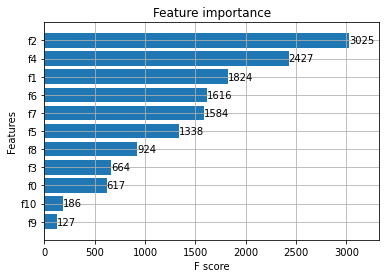

In [549]:
plot_importance(xgbr, height=0.8)

In [550]:
df[:1]

,exp_min,m_code,p_code,p_group,unit_price,month,hour,min,day_num,rain,group_m,total_price
0,20.0,100346,201072,6,39900,1,6,0,2,0,0,2099000.0


In [563]:
xgbr.score(train_x,train_y)

0.8014470490929486

In [564]:
xgbr.score(test_x,test_y)

0.7547914803460455

In [197]:
from sklearn.metrics import mean_absolute_error

In [403]:
for i in range(10):
    n = i
    price = xgbr.predict(test_x[n].reshape(1,-1))
    print('test[%d]의 추정 price = %.2f' % (n, price))
    print('test[%d]의 실제 price = %.2f' % (n, test_y[n]))
    print('추정 오류 = rmse(추정 price - 실제 price) = %.2f' % np.sqrt(np.square(price - test_y[n])))
    print('추정 오류 = mae = %.2f' % mean_absolute_error(price,test_y[n]))
    print('-'*20)

test[0]의 추정 price = 32946168.00
test[0]의 실제 price = 28473000.00
추정 오류 = rmse(추정 price - 실제 price) = 4473168.00
추정 오류 = mae = 4473168.00
--------------------
test[1]의 추정 price = 21460042.00
test[1]의 실제 price = 17124000.00
추정 오류 = rmse(추정 price - 실제 price) = 4336042.00
추정 오류 = mae = 4336042.00
--------------------
test[2]의 추정 price = 19757946.00
test[2]의 실제 price = 11971000.00
추정 오류 = rmse(추정 price - 실제 price) = 7786946.00
추정 오류 = mae = 7786946.00
--------------------
test[3]의 추정 price = 37575576.00
test[3]의 실제 price = 24294000.00
추정 오류 = rmse(추정 price - 실제 price) = 13281576.00
추정 오류 = mae = 13281576.00
--------------------
test[4]의 추정 price = 4221342.50
test[4]의 실제 price = 4643000.00
추정 오류 = rmse(추정 price - 실제 price) = 421657.50
추정 오류 = mae = 421657.50
--------------------
test[5]의 추정 price = 22010190.00
test[5]의 실제 price = 11612000.00
추정 오류 = rmse(추정 price - 실제 price) = 10398190.00
추정 오류 = mae = 10398190.00
--------------------
test[6]의 추정 price = 6782053.00
test[6]의 실제 price = 9482000

# Catboost

In [141]:
pip install catboost

     |████████████████████████████████| 66.1MB 54kB/s 


In [142]:
from catboost import Pool,CatBoostRegressor

In [143]:
train_pool=Pool(train_x,train_y)

In [144]:
test_pool=Pool(test_x)

In [145]:
cbr=CatBoostRegressor(iterations=5,depth=10,learning_rate=0.1,loss_function='MAPE')

In [146]:
cbr.fit(train_pool)

0:	learn: 0.7481858	total: 90.9ms	remaining: 364ms
1:	learn: 0.7479706	total: 112ms	remaining: 168ms
2:	learn: 0.7444173	total: 133ms	remaining: 89ms
3:	learn: 0.7439304	total: 154ms	remaining: 38.4ms
4:	learn: 0.7390779	total: 174ms	remaining: 0us


In [147]:
pred=cbr.predict(test_pool)

In [148]:
print(pred)

[4646675.10003986 4668978.50037221 4646824.40004209 ... 5404275.01132898
 4688015.70065589 4640000.48994284]


In [149]:
for i in range(10):
    n = i
    price = pred[n]
    print('test[%d]의 추정 price = %.2f' % (n, price))
    print('test[%d]의 실제 price = %.2f' % (n, test_y[n]))
    print('추정 오류 = rmse(추정 price - 실제 price) = %.2f' % np.sqrt(np.square(price - test_y[n])))

    print('-'*20)

test[0]의 추정 price = 4646675.10
test[0]의 실제 price = 8334000.00
추정 오류 = rmse(추정 price - 실제 price) = 3687324.90
--------------------
test[1]의 추정 price = 4668978.50
test[1]의 실제 price = 68054000.00
추정 오류 = rmse(추정 price - 실제 price) = 63385021.50
--------------------
test[2]의 추정 price = 4646824.40
test[2]의 실제 price = 70929000.00
추정 오류 = rmse(추정 price - 실제 price) = 66282175.60
--------------------
test[3]의 추정 price = 4691194.26
test[3]의 실제 price = 12372000.00
추정 오류 = rmse(추정 price - 실제 price) = 7680805.74
--------------------
test[4]의 추정 price = 4664955.46
test[4]의 실제 price = 86252000.00
추정 오류 = rmse(추정 price - 실제 price) = 81587044.54
--------------------
test[5]의 추정 price = 6345225.72
test[5]의 실제 price = 28806000.00
추정 오류 = rmse(추정 price - 실제 price) = 22460774.28
--------------------
test[6]의 추정 price = 4633720.10
test[6]의 실제 price = 7003000.00
추정 오류 = rmse(추정 price - 실제 price) = 2369279.90
--------------------
test[7]의 추정 price = 4716678.20
test[7]의 실제 price = 19244000.00
추정 오류 = rmse(추정 pr

In [150]:
cbr.score(train_x,train_y)

-51550.36050375613

In [151]:
cbr.score(test_x,test_y)

-12795.307572003718